In [25]:
import pandas as pd
import numpy as np

from scipy import stats
from sympy import *
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.4f}'.format

import warnings
warnings.filterwarnings("ignore")

# Линейная регрессия

# Задача 1

С целью анализа взаимного влияния зарплаты и текучести рабочей силы на пяти однотипных фирмах с одинаковым числом работников проведены измерения уровня месячной зарплаты $Х$ и числа уволившихся за год рабочих $Y$:


|Переменные|1|2|3|4|5|
|---|---|---|---|---|---|
|X|100|150|200|250|300|
|Y|60|35|20|20|15|

Найти линейную регрессию $Y$ на $X$, выборочный коэффициент корреляции. 

In [3]:
df = pd.DataFrame([[100, 150, 200, 250, 300], 
                   [60, 35, 20, 20, 15]], index=['X', 'Y']).T

df

,X,Y
0,100,60
1,150,35
2,200,20
3,250,20
4,300,15


#### Находим выборочный коэффициент корреляции

In [4]:
stats.pearsonr(x=df['X'], y=df['Y'], alternative='two-sided')

PearsonRResult(statistic=-0.9036961141150638, pvalue=0.03535284700251748)

#### Находим линейную регрессию $Y$ на $X$

<Figure size 10000x20000 with 0 Axes>

<Figure size 10000x20000 with 0 Axes>

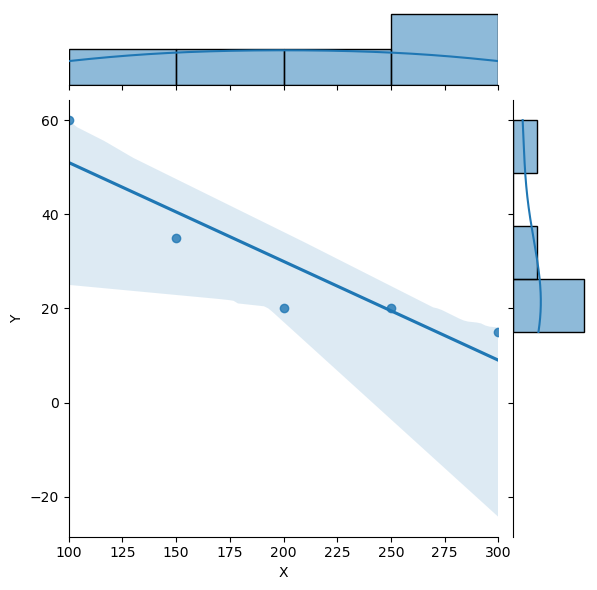

In [22]:
import seaborn as sns

fig = plt.figure(figsize=(100, 200))
axes = sns.jointplot(
    x=df['X'], y=df['Y'],
    kind='reg',
    ci=95)
plt.show()

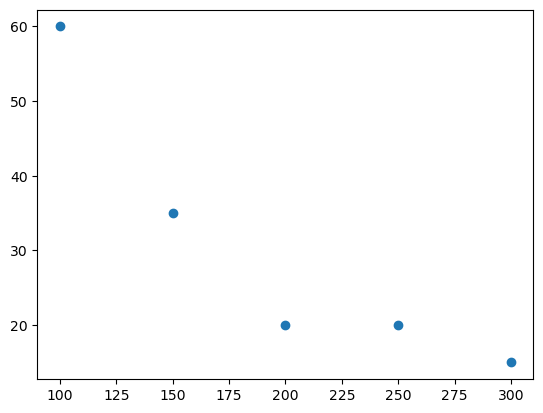

In [18]:
plt.scatter(df['X'], df['Y'])


plt.show()

In [31]:
model_linear_ols = smf.ols(formula='Y ~ X', data=df)
result_linear_ols = model_linear_ols.fit()
print(result_linear_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     13.36
Date:                Sat, 26 Nov 2022   Prob (F-statistic):             0.0354
Time:                        14:23:34   Log-Likelihood:                -16.850
No. Observations:                   5   AIC:                             37.70
Df Residuals:                       3   BIC:                             36.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.0000     12.186      5.908      0.0

In [ ]:
stats.f.